In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import glob
import sys
import os
import numpy as np
import pandas as pd

from pprint import pprint

import re
from scipy.signal import correlate2d

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import SNOM_Import
import hdf5storage

import scipy.io as sio


In [3]:
sys.path.append('/mnt/c/Users/conor/Git_Projects/PHD')

In [4]:
files = dict()

for i, file_path in tqdm(enumerate(glob.glob("/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/*HEADR*")[-100:])):

    file_name = file_path.split('/')[-1].split('HEADR')[0]
    files[file_name] = SNOM_Import.SNOM_File(file_path[:-14])


In [5]:
df = pd.DataFrame({name: vars(file) for name, file in files.items()}).T

In [6]:
df.loc['2686-0-']

fileName           /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...
name                                                          2686-0
__HEADR_RAW__      Number of Files              4 \n\nStart time=...
number_of_files                                                    4
start_time                                       25/08/2020 10:27:21
end_time                                         25/08/2020 10:45:02
pre_scan                                                            
sample                                                    C6 on Gold
fibre                                           608-569 6 um cleaved
snom_mode                                                          0
scan_rate                                                      50 ms
afm_gain                                                           1
amplitude                                                   0.054  V
frequency                                                  4.791 kHz
vres                              

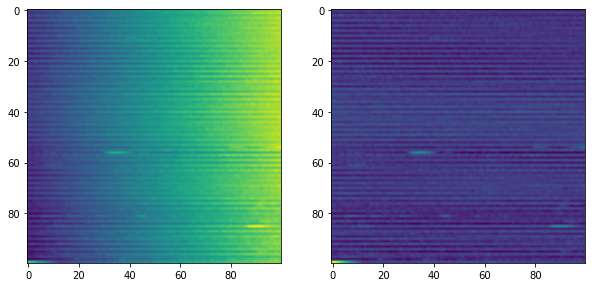

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.imshow(df.iloc[18].FTOPO)
#plt.colorbar(ax)
ax2.imshow(SNOM_Import.plane_correct(df.iloc[18].FTOPO))
#plt.colorbar(ax2)

In [8]:
df=pd.DataFrame({k:vars(v) for k,v in files.items()}).T

In [12]:
background = pd.read_excel('/mnt/c/Users/conor/Git_Projects/PHD/Human_Insulin_Background_SNOM_Scans_3.xlsx', index_col=0)
df['background_scan'] = background['background_scan']
df['sample']=background['sample']
df['Accept']=background['Accept']
df['Batch'] = background['Batch']

In [13]:
background

fileName  \
2657-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2658-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2659-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2660-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2661-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
...                                                    ...   
2748-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2749-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   
2750-0-                                                NaN   
2751-0-                                                NaN   
2752-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...   

                                             __HEADR_RAW__  number_of_files  \
2657-0-  Number of Files              4 \n\nStart time=...              4.0   
2658-0-  Number of Files              4 \n\nStart time=...              4.0   
2659-0-  Number of Files              4 \n\nStart time=...              4.0   
2660-0-  Number of Files              4 \n\nStart time=...              4.0   
2661-0-  Number of Files              4 \n\nStart time=...              4.0   
...                                                    ...              ...   
2748-0-  Number of Files              4 \n\nStart time=...              4.0   
2749-0-  Number of Files              4 \n\nStart time=...              4.0   
2750-0-                                                NaN              NaN   
2751-0-                                                NaN              NaN   
2752-0-  Number of Files              4 \n\nStart time=...              4.0   

                  start_time             end_time  pre_scan  \
2657-0-  22/08/2020 13:11:10  22/08/2020 13:28:54       NaN   
2658-0-  22/08/2020 14:11:57  22/08/2020 14:29:39       NaN   
2659-0-  22/08/2020 14:33:05  22/08/2020 14:50:45       NaN   
2660-0-  22/08/2020 15:03:25  22/08/2020 15:21:09       NaN   
2661-0-  22/08/2020 15:26:30  22/08/2020 15:44:15       NaN   
...                      ...                  ...       ...   
2748-0-  09/09/2020 09:34:00  09/09/2020 09:50:59       NaN   
2749-0-  09/09/2020 09:51:34  09/09/2020 10:08:18       NaN   
2750-0-                  NaN                  NaN       NaN   
2751-0-                  NaN                  NaN       NaN   
2752-0-  09/09/2020 10:54:04  09/09/2020 11:11:45       NaN   

                           sample                 fibre  snom_mode scan_rate  \
2657-0-  Gold after piranha clean  608-569 6 um cleaved        0.0     50 ms   
2658-0-  Gold after piranha clean  608-569 6 um cleaved        0.0     50 ms   
2659-0-  Gold after piranha clean  608-569 6 um cleaved        0.0     50 ms   
2660-0-  Gold after piranha clean  608-569 6 um cleaved        0.0     50 ms   
2661-0-  Gold after piranha clean  608-569 6 um cleaved        0.0     50 ms   
...                           ...                   ...        ...       ...   
2748-0-     C6 on Au with HI pH 7  608-569 6 um cleaved        0.0     50 ms   
2749-0-     C6 on Au with HI pH 7  608-569 6 um cleaved        0.0     50 ms   
2750-0-                       NaN                   NaN        NaN       NaN   
2751-0-                       NaN                   NaN        NaN       NaN   
2752-0-     C6 on Au with HI pH 2  608-569 6 um cleaved        0.0     50 ms   

         ...  scan_size num_points step_size x-start y-start area  operator  \
2657-0-  ...      500.0      100.0       5.0  -250.0  -250.0  NaN       NaN   
2658-0-  ...      500.0      100.0       5.0  -250.0  -250.0  NaN       NaN   
2659-0-  ...      500.0      100.0       5.0  -250.0  -250.0  NaN       NaN   
2660-0-  ...      500.0      100.0       5.0  -250.0  -250.0  2.0       NaN   
2661-0-  ...      500.0      100.0       5.0  -250.0  -250.0  2.0       NaN   
...      ...        ...        ...       ...     ...     ...  ...       ...   
2748-0-  ...      100.0      100.0       1.0  -250.0  -250.0  2.0  Caroline   
2749-0

In [14]:
df.Accept.values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Crop Edge',
       'Crop Edge', 'Crop Edge', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'y', 'y', 'y', 'y', 'Crop Edge', 'Crop Edge', 'Crop Edge',
       'Y', 'Y', 'Y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'n', 'n', 'n', 'Crop Edge', 'Crop Edge', 'Crop Edge'], dtype=object)

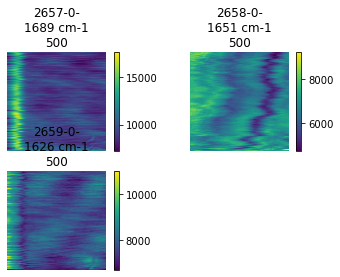

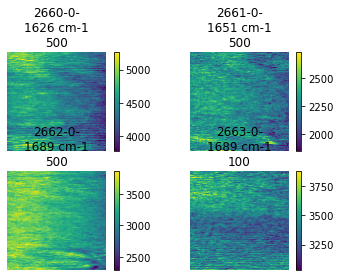

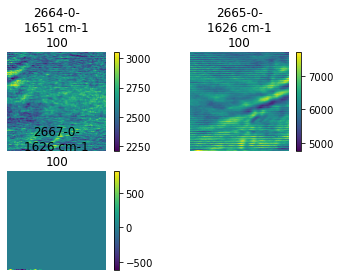

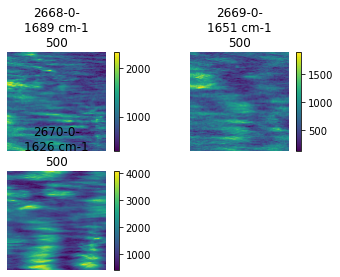

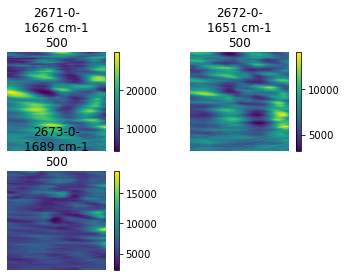

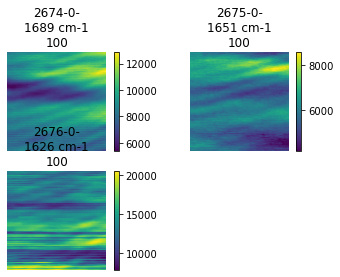

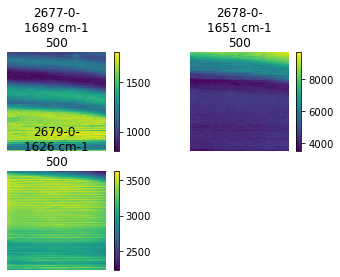

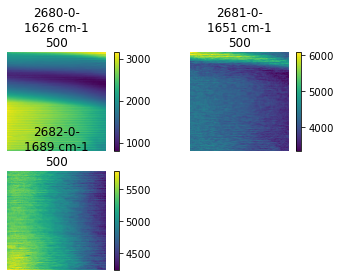

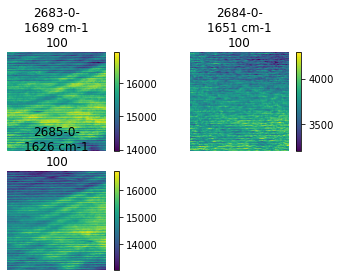

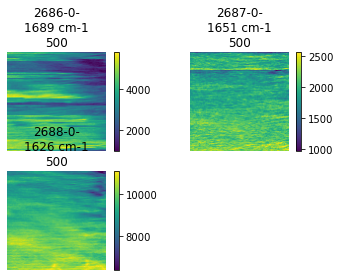

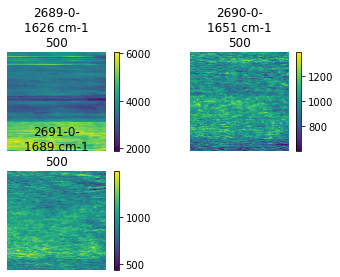

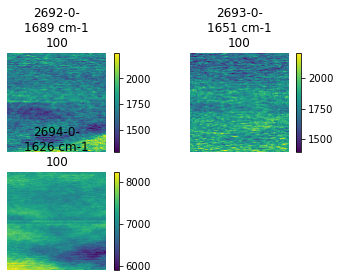

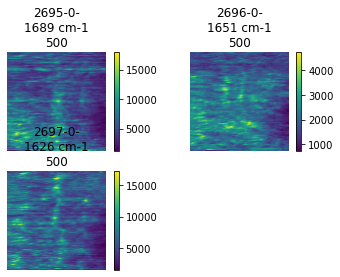

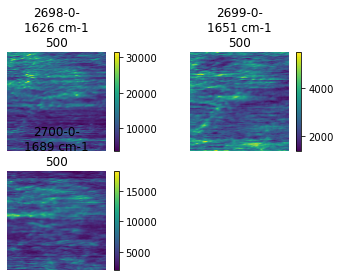

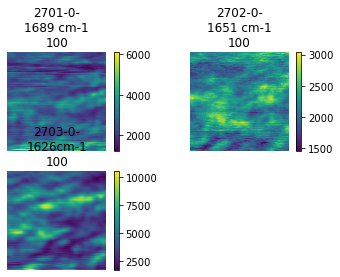

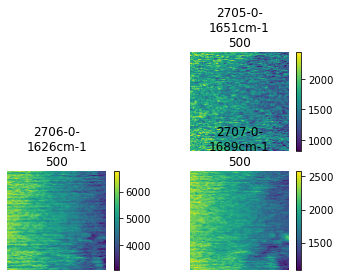

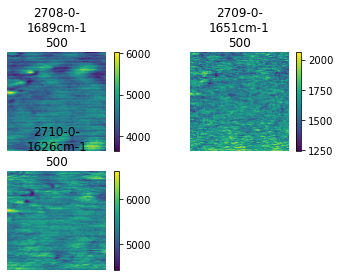

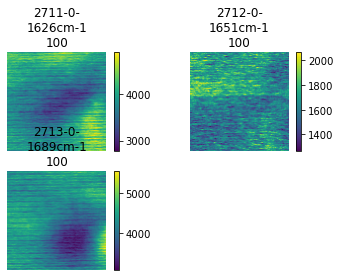

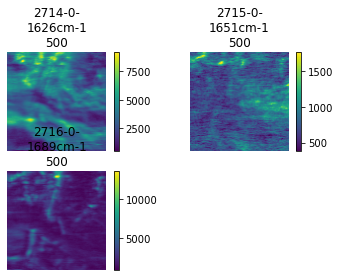

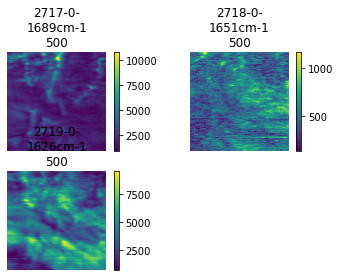

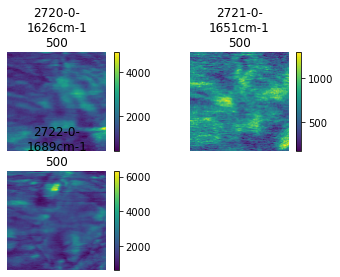

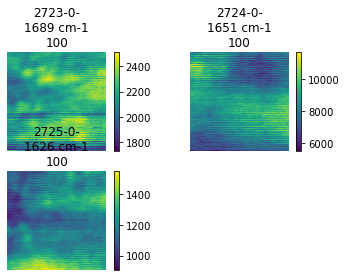

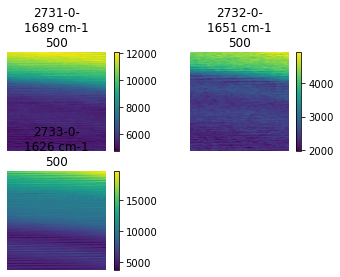

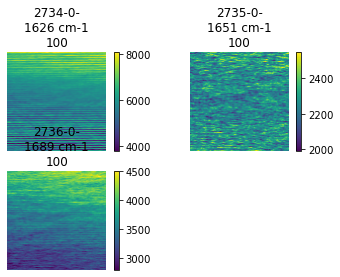

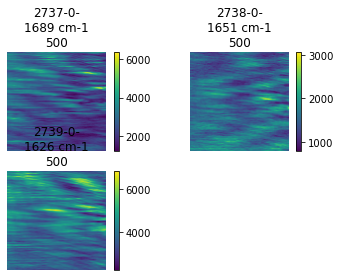

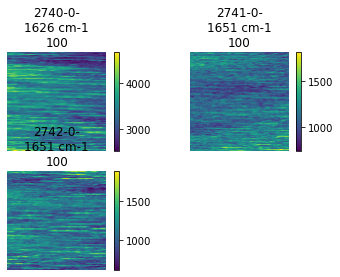

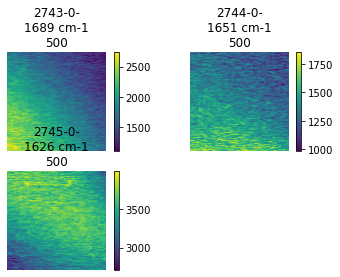

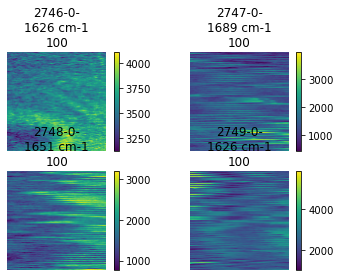

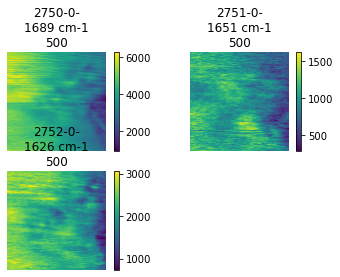

In [15]:
for batch_n, df_ in df.groupby('Batch'):

    fig, axes = plt.subplots(ncols=2, nrows=2)
    [ax.axis('off') for ax in axes.flatten()]

    for (index, row), ax in zip(df_.T.iteritems(), axes.flatten()):

        sensitivity = int(row.sensitivity.replace(' ','')[0])

        try:
            #bkg = bkgs[row.background_scan][row.wavenumber]
            ims=ax.imshow(row.FSNOM*sensitivity)
            ax.set_title(f'{index}\n'+ '\n'.join(row[['wavenumber','scan_size']]))
            fig.colorbar(ims, ax=ax)

        except:
            pass

    fig.savefig(f'/mnt/c/Users/conor/Git_Projects/PHD/Work_For_Caroline/Plots_15_10_2020/{batch_n}.png', bbox_inches='tight')
        



1626cm-1 C18 on Au
1651cm-1 C18 on Au
1689cm-1 C18 on Au
1626cm-1 C18 on Gold after piranha clean
1651cm-1 C18 on Gold after piranha clean
1689cm-1 C18 on Gold after piranha clean
1626cm-1 C6 on Au
1651cm-1 C6 on Au
1689cm-1 C6 on Au
1626cm-1 C6 on Gold after piranha clean
1651cm-1 C6 on Gold after piranha clean
1689cm-1 C6 on Gold after piranha clean
1626cm-1 Gold after piranha clean
1651cm-1 Gold after piranha clean
1689cm-1 Gold after piranha clean


Text(0.5, 0, 'Pixel Intensity')

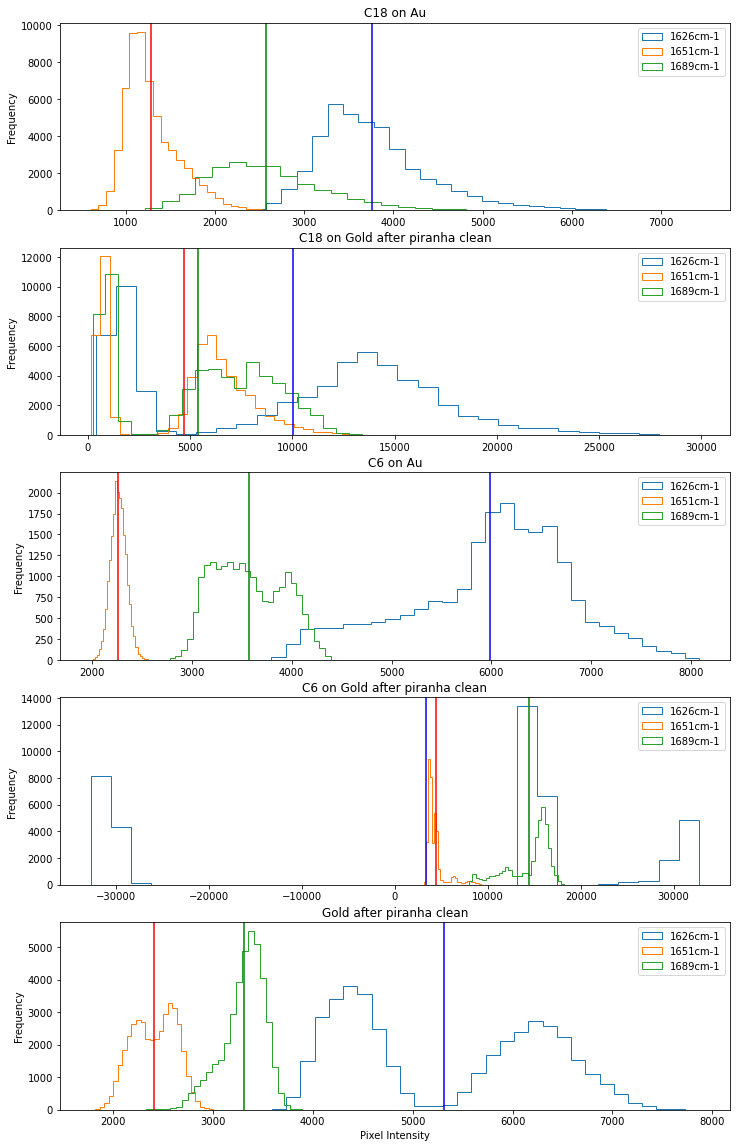

In [19]:
fig, axes = plt.subplots(nrows=5, figsize=(12,20), sharex=False)

# Dictionary containing the expectation value for each 
# total background and each wavelength
bkgs={}

for ax, (name, df_) in zip(axes.flatten(), df.query("background_scan=='none' & Accept in ['y','Y']").groupby('sample')):

    wns={}
    for c, (wn, df_wn) in zip(['b','r','g'], df_.groupby('wavenumber')):

        print(wn.replace(' ',''), name)

        # Extract the sensitivity of the lock in for each image.
        sens = [int(re.search("([0-9]+)", col).groups()[0]) for col in df_wn.sensitivity]

        # Concatenate all of the images together for the current substrate/wavenumber
        fsnom = np.concatenate(df_wn.FSNOM.values*sens)
        bsnom = np.concatenate(df_wn.BSNOM.values*sens)

        total = np.concatenate([fsnom, bsnom])

        hist, bins = np.histogram(total.flatten(), bins=30)
        width = 1.0 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2

        # Calculate expectation value of distribution
        exp = np.sum(center*(hist/hist.sum()))
        
        # Plot histograms and expectation value
        ax.axvline(exp, c=c)
        ax.hist(total.flatten(), bins=30, label=f'{wn.replace(" ","")}', histtype='step')

        wns[wn.replace(" ","")] = exp
    bkgs[name]=wns

    ax.set_title(f'{name}')
    ax.set_ylabel('Frequency')
    ax.legend()

ax.set_xlabel('Pixel Intensity')

In [20]:
df.loc[:,'background_scan'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au',
       'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au',
       'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au',
       'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au', 'C6 on Au',
       'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au',
       'C6 on Au', 'C6 on Au', 'C6 on Au', 'C6 on Au', 'C18 on Au',
       'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au',
       'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au', 'C18 on Au',
       'C18 on Au', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'C6 on Au',
       'C6 on Au', 

In [129]:
test_images={}

for file_ in tqdm(glob.glob('/mnt/c/Users/conor/Google Drive/PhD/SNOM_Creep_Corrected/*.mat')):

    file_dict = hdf5storage.loadmat(file_)

    for file_name, _file in file_dict.items():

        #try:
        snom_file=files[file_name[4:]+'-0-']
        
        sens = int(re.search("([0-9]+)", snom_file.sensitivity).groups()[0])

        try:
            bkg_scan=bkgs[df.loc[snom_file.name+'-','background_scan']][snom_file.wavenumber.replace(' ','')]
        except:
            continue

        FSNOM = (_file[0][0][0][0]*sens)#/bkg_scan
        BSNOM = (_file[0][0][0][1]*sens)#/bkg_scan
        FZERO = _file[0][0][0][2]
        BZERO = _file[0][0][0][3]
        FTOPO = _file[0][0][0][4]
        BTOPO = _file[0][0][0][5]

        FSNOM_Tilt_Corrected = SNOM_Import.plane_correct(_file[0][0][0][0])
        BSNOM_Tilt_Corrected = SNOM_Import.plane_correct(_file[0][0][0][1])
        FTOPO_Tilt_Corrected = SNOM_Import.plane_correct(_file[0][0][0][4])
        BTOPO_Tilt_Corrected = SNOM_Import.plane_correct(_file[0][0][0][5])

        data_files={
            'Name': file_name[4:]+'-0-',
            'FSNOM': FSNOM,
            'BSNOM': BSNOM,
            'FZERO': FZERO,
            'BZERO': BZERO,
            'FTOPO': FTOPO,
            'BTOPO': BTOPO,
            'FSNOM_Tilt_Corrected': FSNOM_Tilt_Corrected,
            'BSNOM_Tilt_Corrected': BSNOM_Tilt_Corrected,
            'FTOPO_Tilt_Corrected': FTOPO_Tilt_Corrected,
            'BTOPO_Tilt_Corrected': BTOPO_Tilt_Corrected,
        }

        test_images[file_name[4:]+'-0-'] = data_files

        file_path = os.path.join(os.getcwd(), 'tilt_corrected_files', 'CS')
        file_name = snom_file.name+'.mat'
        
        try: os.mkdir(file_path)
        except: pass

        sio.savemat(os.path.join(file_path, file_name), mdict=data_files)

In [12]:
df['wavenumber']=df.apply(lambda row: row['wavenumber'].replace(' ',''),axis=1)

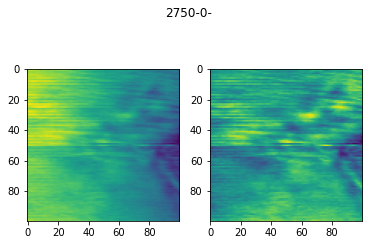

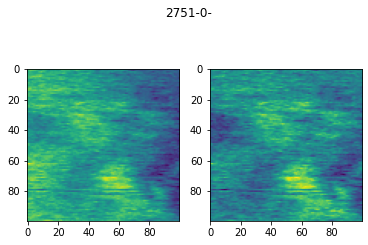

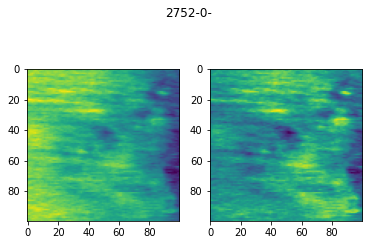

In [13]:

for n, row in df.loc[['2750-0-','2751-0-','2752-0-'], ['wavenumber', 'FSNOM', 'BSNOM', 'FTOPO']].iterrows():
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)

    im = row.FSNOM

    fig.suptitle(n)
    ax1.imshow(im)
    ax2.imshow(SNOM_Import.plane_correct(im))

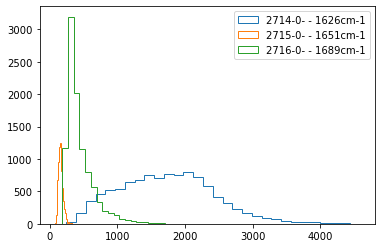

In [14]:
fig, ax = plt.subplots()

for n, row in df.loc[['2714-0-','2715-0-','2716-0-'], ['wavenumber', 'FSNOM']].iterrows():

    ax.hist(row.FSNOM.flatten(), label=f'{n} - {row.wavenumber}', histtype='step', bins=30)

plt.legend()

In [23]:
df.query("background_scan=='none' & Accept in ['y','Y']")

fileName    name  \
2660-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2660-0   
2661-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2661-0   
2662-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2662-0   
2663-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2663-0   
2664-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2664-0   
2665-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2665-0   
2668-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2668-0   
2669-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2669-0   
2670-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2670-0   
2671-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2671-0   
2672-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2672-0   
2673-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2673-0   
2674-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2674-0   
2675-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2675-0   
2676-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2676-0   
2677-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2677-0   
2678-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2678-0   
2679-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2679-0   
2683-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2683-0   
2684-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2684-0   
2685-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2685-0   
2734-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2734-0   
2735-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2735-0   
2736-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2736-0   
2737-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2737-0   
2738-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2738-0   
2739-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2739-0   
2740-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2740-0   
2741-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2741-0   
2742-0-  /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...  2742-0   

                                             __HEADR_RAW__ number_of_files  \
2660-0-  Number of Files              4 \n\nStart time=...               4   
2661-0-  Number of Files              4 \n\nStart time=...               4   
2662-0-  Number of Files              4 \n\nStart time=...               4   
2663-0-  Number of Files              4 \n\nStart time=...               4   
2664-0-  Number of Files              4 \n\nStart time=...               4   
2665-0-  Number of Files              4 \n\nStart time=...               4   
2668-0-  Number of Files              4 \n\nStart time=...               4   
2669-0-  Number of Files              4 \n\nStart time=...               4   
2670-0-  Number of Files              4 \n\nStart time=...               4   
2671-0-  Number of Files              4 \n\nStart time=...               4   
2672-0-  Number of Files              4 \n\nStart time=...               4   
2673-0-  Number of Files              4 \n\nStart time=...               4   
2674-0-  Number of Files              4 \n\nStart time=...               4   
2675-0-  Number of Files              4 \n\nStart time=...               4   
2676-0-  Number of Files              4 \n\nStart time=...               4   
2677-0-  Number of Files              4 \n\nStart time=...               4   
2678-0-  Number of Files              4 \n\nStart time=...               4   
2679-0-  Number of Files              4 \n\nStart time=...               4   
2683-0-  Number of Files              4 \n\nStart time=...               4   
2684-0-  Number of Files              4 \n\nStart time=...               4   
2685-0-  Number of Files              4 \n\nStart time=...               4   
2734-0-  Number of Files              4 \n\nStart time=...               4   
2735-0-  Number of Files              4 \n\nStart time=...               4   
2736-0-

In [26]:
df.query("background_scan=='none' & Accept in ['y','Y']").loc[:,'background_scan']

2660-0-    none
2661-0-    none
2662-0-    none
2663-0-    none
2664-0-    none
2665-0-    none
2668-0-    none
2669-0-    none
2670-0-    none
2671-0-    none
2672-0-    none
2673-0-    none
2674-0-    none
2675-0-    none
2676-0-    none
2677-0-    none
2678-0-    none
2679-0-    none
2683-0-    none
2684-0-    none
2685-0-    none
2734-0-    none
2735-0-    none
2736-0-    none
2737-0-    none
2738-0-    none
2739-0-    none
2740-0-    none
2741-0-    none
2742-0-    none
Name: background_scan, dtype: object

                         sample wavenumber area
2725-0-  C18 on Au with HI pH 2  1626 cm-1    4
                         sample wavenumber area
2714-0-  C18 on Au with HI pH 2   1626cm-1    1
2719-0-  C18 on Au with HI pH 2   1626cm-1    2
2720-0-  C18 on Au with HI pH 2   1626cm-1    3
                         sample wavenumber area
2724-0-  C18 on Au with HI pH 2  1651 cm-1    4
                         sample wavenumber area
2697-0-  C18 on Au with HI pH 7  1626 cm-1    1
2698-0-  C18 on Au with HI pH 7  1626 cm-1    2
                         sample wavenumber area
2703-0-  C18 on Au with HI pH 7   1626cm-1    3
                         sample wavenumber area
2696-0-  C18 on Au with HI pH 7  1651 cm-1    1
2699-0-  C18 on Au with HI pH 7  1651 cm-1    2
2702-0-  C18 on Au with HI pH 7  1651 cm-1    3
                        sample wavenumber area
2704-0-  C6 on Au with HI pH 2   1626cm-1    1
2706-0-  C6 on Au with HI pH 2   1626cm-1    1
2710-0-  C6 on Au with HI pH 2   1626cm-1  

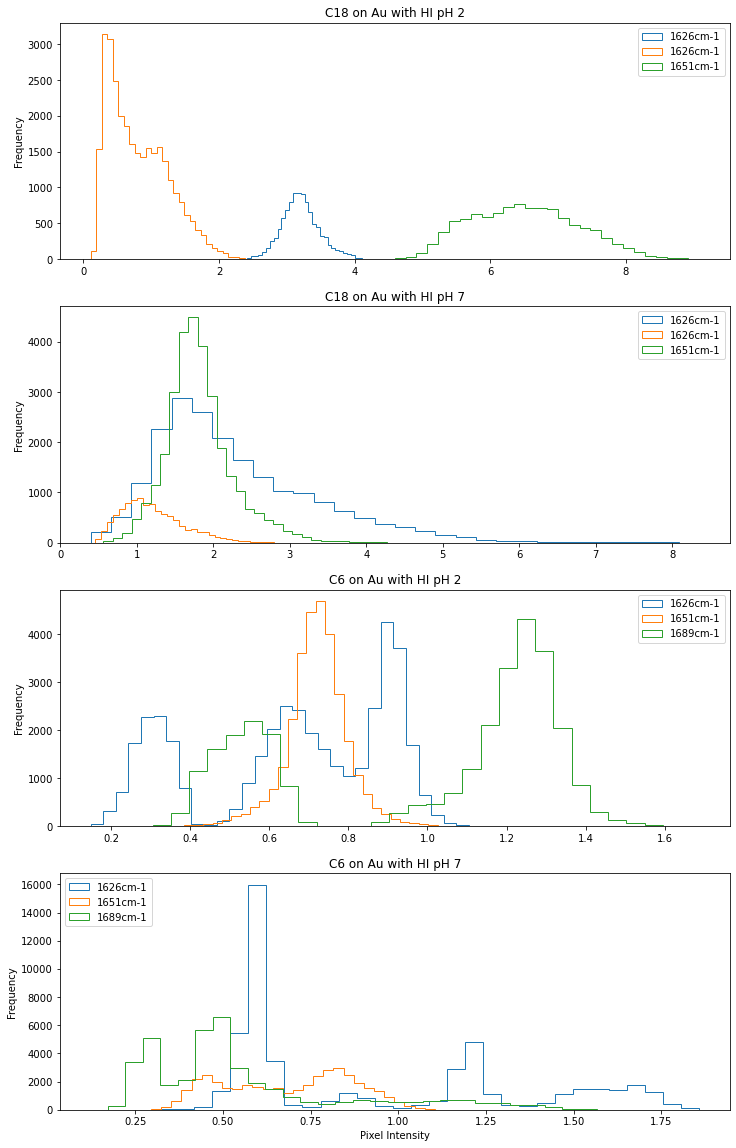

In [27]:
fig, axes = plt.subplots(nrows=4, figsize=(12,20), sharex=False)


for ax, (name, df_) in zip(axes.flatten(), df.query("background_scan!='none' & Accept in ['y','Y']").groupby('sample')):

    wns={}

    for c, (wn, df_wn) in zip(['b','r','g'], df_.groupby('wavenumber')):

        # Extract the sensitivity of the lock in for each image.
        sens = [int(re.search("([0-9]+)", col).groups()[0]) for col in df_wn.sensitivity]

        total=[]

        try:
            bkg = bkgs[df_wn.background_scan[0]][wn.replace(' ','')]
        except:
            continue

        #fsnom = np.concatenate(df_wn.FSNOM.values*sens)
        #bsnom = np.concatenate(df_wn.BSNOM.values*sens)

        print(df_wn[['sample','wavenumber','area']])

        try:
            # Concatenate all of the images together for the current substrate/wavenumber
            try:
                #fsnom = np.concatenate(df_wn.FSNOM.values*sens)
                total.append(np.concatenate((df_wn.FSNOM.values*sens)/bkg))
            except:
                total.append(np.concatenate((df_wn.BSNOM.values*sens)/bkg))
            #bsnom = np.concatenate(df_wn.BSNOM.values*sens)
        except: 
            continue

        total = np.concatenate(total)

        ax.hist(total.flatten(), bins=30, label=f'{wn.replace(" ","")}', histtype='step')

    ax.set_title(f'{name}')
    ax.set_ylabel('Frequency')
    ax.legend()

ax.set_xlabel('Pixel Intensity')
fig.savefig('Insulin_Results_sharex.png', bbox_inches='tight')

In [16]:
def cross_correlate(f,b):

    corr=correlate2d(f, b)

    new_i = np.unravel_index(corr.argmax(), corr.shape)

    fb=np.max([f.shape, b.shape], axis=0)

    output=np.zeros(fb)

    output[0:f.shape[0],0:f.shape[1]] = f
    output[-b.shape[0]:,-b.shape[1]:] = (output[-b.shape[0]:,-b.shape[1]:] + b)/2

    return output


In [17]:
hist, bins = np.histogram(corr.flatten(), bins=30)
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

exp = np.sum(center*(hist/hist.sum()))
exp_i=np.argmin([exp-bin for bin in hist])
print(center[exp_i])

print(np.unravel_index(exp_i, corr.shape))

#plt.plot([bin-exp for bin in hist])
plt.axvline(exp,c='r')

plt.bar(center, hist, align='center', width=width)
plt.show()

NameError: name 'corr' is not defined

F((150, 150))
B((150, 150))
O((150, 150))


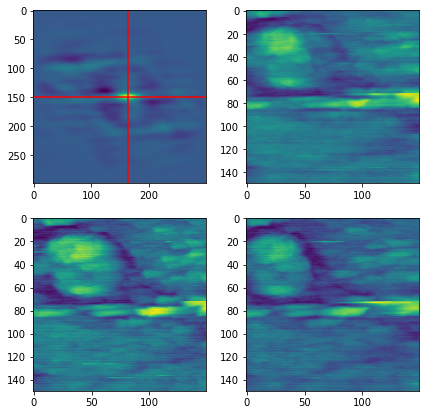

In [26]:
#corr[40:60, 80:100] = 0
#

name = '2720-0-'
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(7,7))

f=SNOM_Import.plane_correct(df.iloc[2].FTOPO)
#f=df.iloc[2].FSNOM
b=SNOM_Import.plane_correct(df.iloc[2].BTOPO)
#b=df.iloc[2].BSNOM

output=cross_correlate(f, b)
corr=correlate2d(f, b)
new_i = np.unravel_index(corr.argmax(), corr.shape)

ax1.imshow(corr)
ax1.axhline(new_i[0],c='r')
ax1.axvline(new_i[1],c='r')

ax2.imshow(output)
ax3.imshow(f)
ax4.imshow(b)

print(f'F({f.shape})')
print(f'B({b.shape})')
print(f'O({output.shape})')

In [8]:
df.iloc[0]

fileName           /mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant...
name                                                          2644-0
__HEADR_RAW__      Number of Files              4 \n\nStart time=...
number_of_files                                                    4
start_time                                       29/07/2020 17:47:34
end_time                                         29/07/2020 18:25:15
pre_scan                                                            
sample                                                 core 3 tumour
fibre                                              805-792 um etched
snom_mode                                                          0
scan_rate                                                      20 Hz
afm_gain                                                           v
amplitude                                                     0.027V
frequency                                                  4.688 kHz
vres                              

In [55]:
fig, axes = plt.subplots(ncols=2, nrows=4)

for index, row in df.iterrows():

        im_file=row
        print(row.index)



        ftopo = im_file.FTOPO
        fsnom = im_file.FSNOM

        if not isinstance(ftopo, np.ndarray):

                continue

        plane = SNOM_Import.plane_correct(ftopo)

        print(row.background_scan)

        bkg = bkgs[row.background_scan[row.wavelength]]
        correction = row.sensitivity/bkg

        print(correction)

        plane_n = (plane)/plane.max()
        fsnom_n = (fsnom)/fsnom.max()

        print(im_file.fileName)

        data = {'FTOPO': im_file.FTOPO,
                'BTOPO': im_file.BTOPO,
                'FSNOM': im_file.FSNOM,
                'BSNOM': im_file.BSNOM,
                'FTOPO_Tilt_corrected': im_file.FTOPO-SNOM_Import.plane_correct(im_file.FTOPO),
                'BTOPO_Tilt_corrected': im_file.BTOPO-SNOM_Import.plane_correct(im_file.BTOPO),
                'FSNOM_Tilt_corrected': im_file.FSNOM-SNOM_Import.plane_correct(im_file.FSNOM),
                'BSNOM_Tilt_corrected': im_file.BSNOM-SNOM_Import.plane_correct(im_file.BSNOM)}

        if not os.path.exists(os.path.join(os.getcwd(), 'processed_images')):
                os.makedirs(os.path.join(os.getcwd(), 'processed_images'))

        sio.savemat(os.path.join(os.getcwd(), 'processed_images',f'{row.name}.mat'), data)

        for ax, (title, im) in zip(axes.flatten(), data.items()):

                ax.imshow(im)
                ax.set_title(title) 

Index(['fileName', 'name', '__HEADR_RAW__', 'number_of_files', 'start_time',
       'end_time', 'pre_scan', 'sample', 'fibre', 'snom_mode', 'scan_rate',
       'afm_gain', 'amplitude', 'frequency', 'vres', 'vref', 'wavenumber',
       'pulse_rate', 'pulse_width', 'time_constant', 'sensitivity',
       'sample_tissue', 'sample_patient', 'sample_slice', 'sample_position',
       'wavelength', 'fel_power', 'scan_size', 'num_points', 'step_size',
       'x-start', 'y-start', 'FTOPO', 'FSNOM', 'BTOPO', 'BSNOM', 'area',
       'operator', '', 'background_scan'],
      dtype='object')
nan


TypeError: 'float' object is not subscriptable